# TP3 Grupo 12

In [1]:
# Importando librerías  
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from collections import Counter

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
%matplotlib inline



Función para evaluación del modelo con regresión logística, variando datos de entrada

In [2]:
def logistic_model(X_train, X_test, y_train, y_test):
    '''Creacióm del modelo de Regresión Logistica variando datos de entrada'''
    
    lr = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cholesky")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    lr.fit(X_train_scaled, y_train)
    return lr

## 1. Lectura de DataFrame 

El DataFrame usado para este TP consta de datos provenientes de la plataforma Kaggle, en el que se evalúan algunas variables relacionadas con evaluación de posible fraude en transacciones bancarias realizadas con tarjetas de crédito. Se trata de un Dataset desbalanceado, respecto a la proporción en la variable target (fraud). 

In [3]:
data = pd.read_csv(r'card_transdata.csv', sep=',')
print(f'El dataframe de transacciones está compuesto por {data.shape[1]} columnas y {data.shape[0]} filas') 
print(data.sample(3))
data.shape

El dataframe de transacciones está compuesto por 8 columnas y 1000000 filas
        distance_from_home  distance_from_last_transaction  \
922842            0.968965                        1.098831   
285610            8.383403                       12.352195   
721706          237.283007                        0.072980   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
922842                        0.199694              0.0        0.0   
285610                        0.234388              1.0        1.0   
721706                        2.162581              1.0        0.0   

        used_pin_number  online_order  fraud  
922842              0.0           1.0    0.0  
285610              0.0           1.0    0.0  
721706              0.0           1.0    1.0  


(1000000, 8)

## 2. Descripción breve del DataFrame.


El DataFrame en estudio cuenta con 8 columnas y un total de 1000000 filas (no tiene valores nulos). 

Las columnas contenidas en el DataFrame son: 

2.1 distance_from_home. Indica la distancia desde casa respecto al lugar en donde ocurrió la transacción. Ejemplo: 2.813104. 

2.2 distance_from_last_transaction. Indica la distancia entre el punto de la transacción con respecto a la última transacción registrada. Ejemplo: 0.153290.

2.3 ratio_to_median_purchase_price. es la relación entre el monto de la transacción y el precio medio de compra del cliente. Ejemplo: 1.135134.

2.4 repeat_retailer. Columna con variables dummies para indicar con 1 si la transacción se realizó desde el mismo minorista y con 0 si no. Ejemplo: 1.0.

2.5 used_chip. Columna con variables dummies para indicar con 1 si en la transacción se utilizó el chip de la tarjeta de crédito y con 0 si no se utilizó. Ejemplo: 0.0.

2.6 used_pin_number. Columna con variables dummies que indica con 1 si en la transacción se usó el número de pin y con 0 en caso contrario. Ejemplo: 1.0.

2.7 online_order. Columna con variables dummies en la que se indica con 1 si la transacción corresponde a un pedido en línea y 0 si no fue así. Ejemplo: 1.0. 

2.8 fraud. Columna con variable target que indica si la transacción fue identificada como fraude (1) o no (0). Ejemplo: 1.0.

In [4]:
# Resumen de nombre y tipo de dato por columna

print('\n')
print('-----------Tipo de datos por columna-----------')
print(data.dtypes)



-----------Tipo de datos por columna-----------
distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object


## 3. Distribución de los datos.  

<AxesSubplot: >

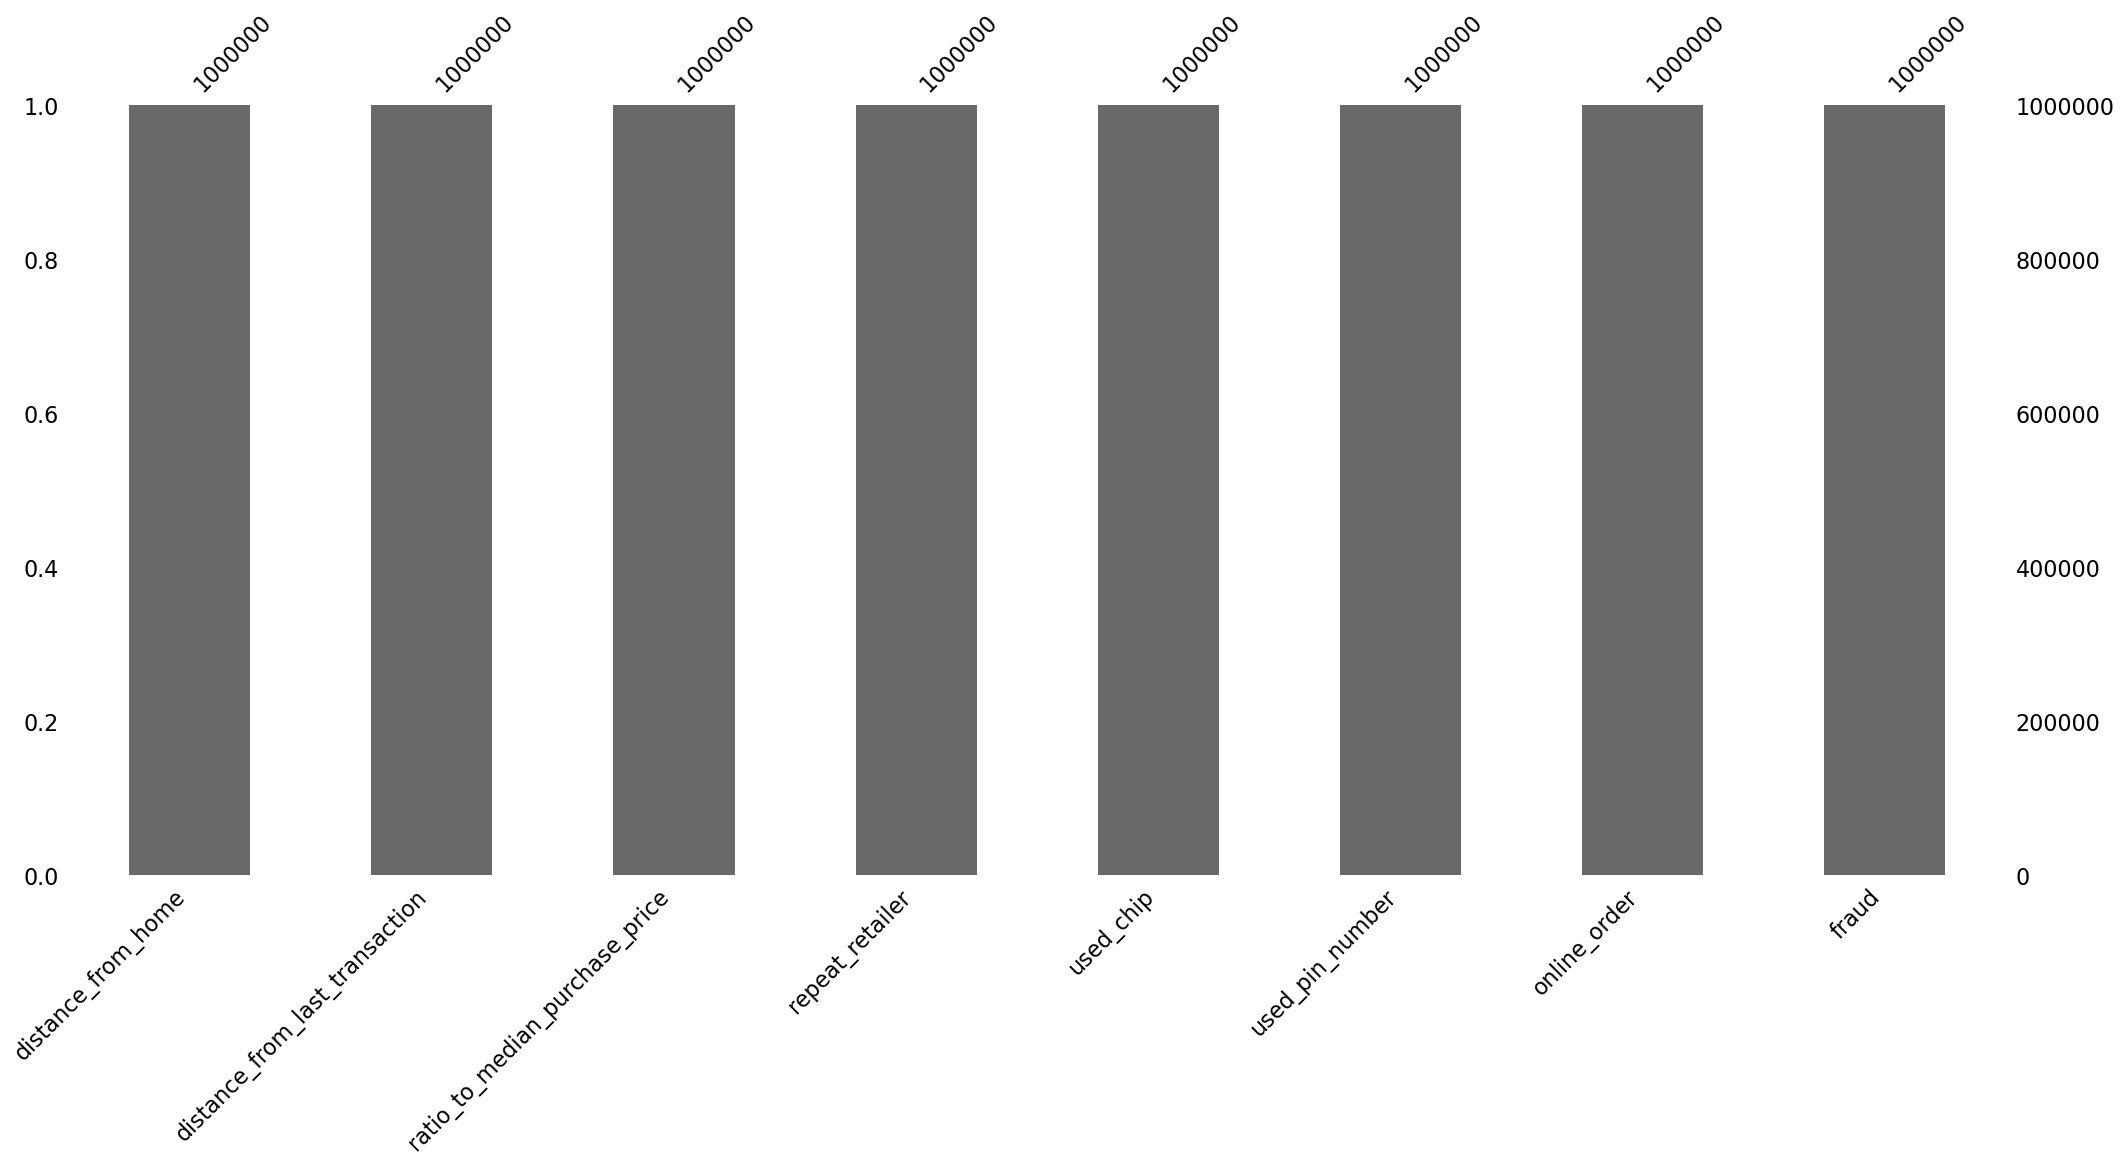

In [5]:
# Para saber valores no nulos

msno.bar(data)

Dentro del DataFrame no se encuentran valores nulos, todas las variables a usar en los diferentes modelos (KNN, Naives Bayes y Regresión Logística) tienen los los datos completos. 

## * Variable TARGET a Determinar

Según el análisis realizado y la propuesta original en el dataset, la variable target a considerar, en la construcción de los diferentes modelos,  será la columna "fraud".

In [6]:
# Considerando lo anterior, resulta necesario conocer la proporción de la variable target
count_classes = data.fraud.value_counts(sort=True)
count_classes

0.0    912597
1.0     87403
Name: fraud, dtype: int64

Para una población de 1000000 de transacciones, tan sólo 87403 son etiquetadas como casos de fraude. Representan aproximadamente el 9% de las muestras.

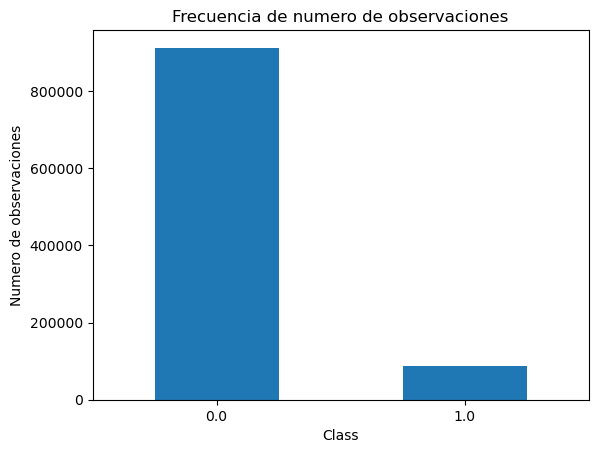

In [7]:
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frecuencia de numero de observaciones")
plt.xlabel("Class")
plt.ylabel("Numero de observaciones");

# Eliminar esta fila al terminar de escribir el TP3

# Propuestas 

1. Trabajar con dataset total. (1MM de registros, proporción variable target 90-10)
2. Seleccionar menor cantidad de registros y buscando una proporción de la variable target 70-30, para tener el datasets menos desbalanceado. Según cálculos , se debería extraer una muestra de 291343 datos totales. 


A partir de la selección del dataset: 

1. Aplicar los siguientes modelos sobre el conjunto de datos: 

   1.a. KNN. (Carlos)

   1.b. Naives Bayes. (Santiago)
   
   1.c. Regresión Logística. (Moises) 

In [8]:
# Dataset de sólo no fraude 
df_nf = df.loc[df['fraud'] == 0]
df_nf.fraud.value_counts()
df_nf2 = df_nf.sample(203940)
print(df_nf2.fraud.value_counts())

# Generar otro dataset con los registros de fraude 
df_f = df.loc[df['fraud'] == 1]
df_f.fraud.value_counts()


NameError: name 'df' is not defined

In [ ]:
datos = pd.merge(df_nf2, df_f, how = 'outer')
datos.fraud.value_counts()

display(datos.sample(10))



## 4. Aplicando modelo de Regresión Logística

4.1 Full Datos. Como 1era aproximación para la generación del modelo, será usado todo el volumne de datos. Sabiendo que la variable a predecir se encuentra desbalanceada.  

In [9]:
# Para considerar las variables predictoras

feature_cols = [x for x in data.columns if ((x != 'fraud'))]
feature_cols

['distance_from_home',
 'distance_from_last_transaction',
 'ratio_to_median_purchase_price',
 'repeat_retailer',
 'used_chip',
 'used_pin_number',
 'online_order']

In [10]:
# División de los datos en train y test
# ==============================================================================
X = data[feature_cols]
y = data['fraud']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        stratify=y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )  

In [11]:
# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
# Entrenando al modelo 
# Instanciamos un objeto de esa clase
logistic_regression = LogisticRegression()
# Ajustamos esta instancia con los datos de entrenamiento
logistic_regression.fit(X_train_scaled, y_train)
print(logistic_regression.coef_)
print(logistic_regression.intercept_)


[[ 0.97663944  0.65304456  2.38697004 -0.19914763 -0.49989194 -4.0422075
   3.16706775]]
[-6.18311772]


In [13]:
# Hacemos predicciones con el modelo entrenado
y_train_pred = logistic_regression.predict(X_train_scaled)
y_test_pred = logistic_regression.predict(scaler.transform(X_test)) # Notar que debemos escalar los datos de testeo antes de realizar predicciones

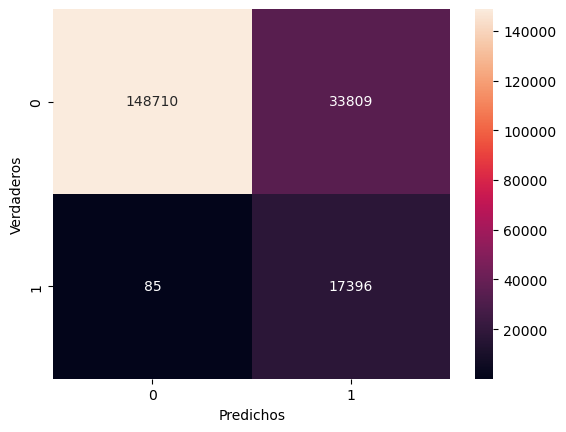

In [34]:
# Elaboramos la matriz de confusión
confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [17]:
logistic_regression.predict_proba(X_test)

c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[9.18484395e-01, 8.15156049e-02],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [2.31548736e-09, 9.99999998e-01],
       [3.73279350e-01, 6.26720650e-01],
       [6.00436965e-04, 9.99399563e-01]])

In [18]:
logistic_regression.predict_proba(X_test).shape

c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(200000, 2)

In [19]:
# Calculemos el accuracy
accuracy_score(y_test, y_test_pred)

0.9592

In [20]:
# Calculo la sensibilidad del modelo
sensibilidad = recall_score(y_test, y_test_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.6005377266746753


In [21]:
puntajef1 = f1_score(y_test, y_test_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.7201262175881465


In [22]:
roc_auc = roc_auc_score(y_test, y_test_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Curva ROC - AUC del modelo:
0.7970445414859139


In [23]:
# Haciendo un resumen de los parámetros obtenidos
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182519
         1.0       0.90      0.60      0.72     17481

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



En la matriz de confusión se obtienen alrededor de 7000 fallos y 10000 aciertos dando un recall de 0.60 y es el valor que queremos mejorar. También es interesante notar que en la columna de f1-score obtenemos muy buenos resultados, a pesar de ello deben ser considerados con ciertas reservas, pues están reflejando una realidad parcial. 

Estas métricas serán consideradas como línea base para comparación y búsqueda de mejora. Un aspecto a evaluar será el tema del hecho que el dataset se encuentra desbalanceado. 

## 4.2. Buscando balancear las clases

### 4.2.1 Penalización de clases mayoritarias

Según literatura de LogisticRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

- class_weight: dict or ‘balanced’, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

- solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification.



In [24]:
penalidad = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cholesky",class_weight="balanced")
penalidad.fit(X_train_scaled, y_train)

y_test_pred = penalidad.predict(scaler.transform(X_test))

In [35]:
def mostrar_resultados(y_test, y_pred):
    confusion_matrix(y_test, y_test_pred)
    #plt.figure(figsize=(12, 12))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='.0f');
    plt.title("Confusion matrix")
    plt.ylabel('Verdaderos')
    plt.xlabel('Predichos')
    plt.show()
    print (classification_report(y_test, y_test_pred))

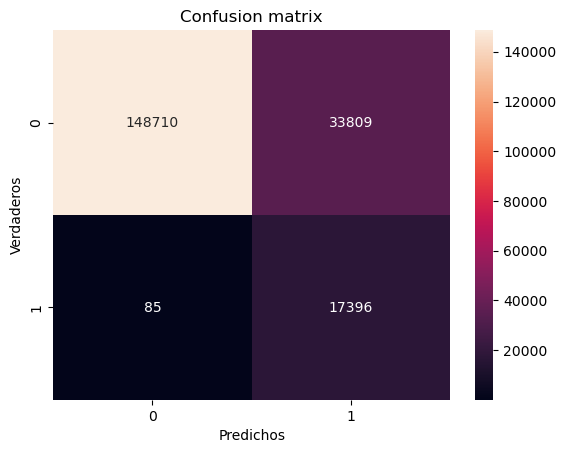

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90    182519
         1.0       0.34      1.00      0.51     17481

    accuracy                           0.83    200000
   macro avg       0.67      0.90      0.70    200000
weighted avg       0.94      0.83      0.86    200000



In [36]:
mostrar_resultados(y_test, y_test_pred)

### 4.2.1 Undersampling (us) sobre la clase predominante (No Fraude)

In [28]:
# us trabaja parecido a KNN
us = NearMiss(n_neighbors=3, version=1)
# Para cambiar proporciones podemos usar version = 3

X_train_res, y_train_res = us.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución antes de resampling {Counter(y_train_res)}')

Distribución antes de resampling Counter({0.0: 730078, 1.0: 69922})
Distribución antes de resampling Counter({0.0: 69922, 1.0: 69922})


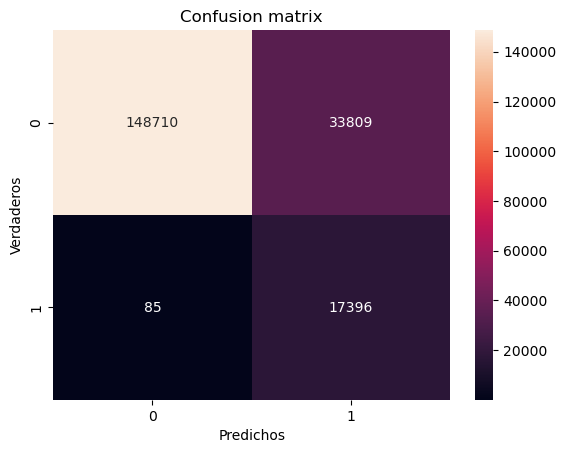

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90    182519
         1.0       0.34      1.00      0.51     17481

    accuracy                           0.83    200000
   macro avg       0.67      0.90      0.70    200000
weighted avg       0.94      0.83      0.86    200000



In [37]:
model = logistic_model(X_train_res, X_test, y_train_res, y_test)
y_test_pred = model.predict(scaler.transform(X_test))

mostrar_resultados(y_test, y_test_pred)

Identifica todos los fraudes porque la probabilidad en el set de entrenamiento la proporción es 50/50. Aumentan los falsos positivos, disminuye el f1 score.

### 4.2.2 Oversampling (os) de la clase minoritaria (Fraude)

Para este caso se usará RandomOverSampler para crear nuevas muestras "sintéticas" para la clase 'Fraude'. 
Al usar 'sampling_strategy' = 0.5, estamos creando muestras sintéticas hasta alcanzar un numero de muestras igual al 50% de la clase mayoritaria (No Fraude), es decir 365039 casos Fraude.

In [30]:
os =  RandomOverSampler(sampling_strategy = 0.5, random_state=1234)
X_train_res, y_train_res = os.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución después de resampling {Counter(y_train_res)}')

Distribución antes de resampling Counter({0.0: 730078, 1.0: 69922})
Distribución después de resampling Counter({0.0: 730078, 1.0: 365039})


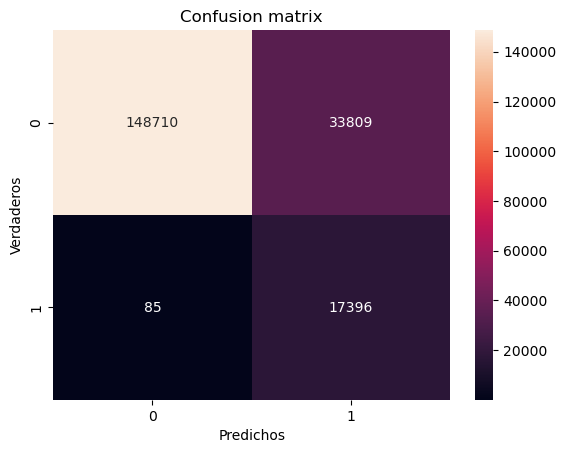

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90    182519
         1.0       0.34      1.00      0.51     17481

    accuracy                           0.83    200000
   macro avg       0.67      0.90      0.70    200000
weighted avg       0.94      0.83      0.86    200000



In [38]:
model = logistic_model(X_train_res, X_test, y_train_res, y_test)
y_test_pred = model.predict(scaler.transform(X_test))

mostrar_resultados(y_test, y_test_pred)

Aumentan los falsos negativos, disminuyen los falsos positivos, aumenta la precisión y el F1 score. Se identifican menor cantidad de casos de Fraude que el caso anterior. 

### 4.2.3 Aplicando modelos conjuntos. (Oversampling (os) y Undersampling (us)) -- Smote-Tomek 

* SMOTE (Synthetic Minority Over-sampling Technique) para oversampling. Puntos vecinos cercanos y agrega puntos “en linea recta” entre ellos. 

* Tomek para undersampling. Elimina los de distinta clase que sean nearest neighbor y deja ver mejor el decisión boundary (la zona limítrofe de las clases).

In [32]:
os_us = SMOTETomek(sampling_strategy=0.5, random_state=1234)
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)
 
print(f'Distribución antes de resampling {Counter(y_train)}')
print(f'Distribución antes de resampling {Counter(y_train_res)}')

Distribución antes de resampling Counter({0.0: 730078, 1.0: 69922})
Distribución antes de resampling Counter({0.0: 729719, 1.0: 364680})


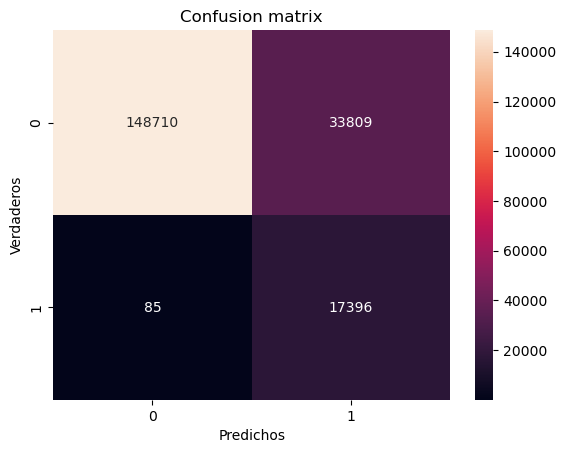

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90    182519
         1.0       0.34      1.00      0.51     17481

    accuracy                           0.83    200000
   macro avg       0.67      0.90      0.70    200000
weighted avg       0.94      0.83      0.86    200000



In [39]:
model = logistic_model(X_train_res, X_test, y_train_res, y_test)
y_test_pred = model.predict(scaler.transform(X_test))

mostrar_resultados(y_test, y_test_pred)

Aumentan los falsos negativos. 

Dudas: 

- ¿por qué el resumen se muestra igual que en el caso anterior?
Podría estar indicando que la mejor aproximación es el resampling en la clase minoritaria.